In [1]:
import h5py
import cartopy.crs as ccrs
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.transform_xy import coor2coor
import numpy as np

In [2]:
path_img = 'F:/Users/86182/Desktop/dianchi_s2_20200511_wgs84_resam50m.tif'
path_atl13 = 'icesat2/py/shiyan/ATL13_2019_subs.h5'


In [3]:
s2_img, s2_img_info = readTiff(path_img)
print(s2_img_info)

{'geoextent': (102.39869027893941, 102.93914220687806, 24.571857541195882, 25.128338224847997), 'geotrans': (102.39869027893941, 0.00045037660661554317, 0.0, 25.128338224847997, 0.0, -0.00045059164668187447), 'geosrs': '4326', 'row': 1235, 'col': 1200, 'bands': 6}


In [4]:
with h5py.File(path_atl13,'r') as f:
    print(f.keys())
    lat_atl13 = f['lat'][:]
    lon_atl13 = f['lon'][:]
    h_atl13 = f['h'][:]
    t_atl13 = f['t_dyr'][:]
    cycle_atl13 = f['cycle'][:]
    rgt_atl13 = f['rgt'][:]
    spot_atl13 = f['spot'][:]
print('number of points:', h_atl13.shape[0])
print('cycle_atl13:', np.unique(cycle_atl13))
print('rgt_atl13:', np.unique(rgt_atl13))

<KeysViewHDF5 ['beam_type', 'cycle', 'h', 'lat', 'lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>
number of points: 11259
cycle_atl13: [2. 3.]
rgt_atl13: [530. 705.]


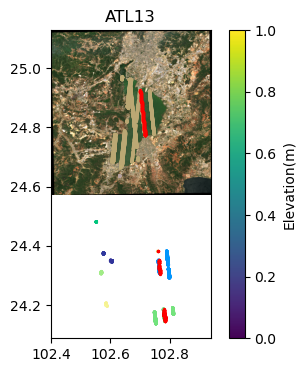

In [13]:
ids_atl13=np.where((spot_atl13==4)&(rgt_atl13==530))[0]

fig=plt.figure(figsize=(12,4))
imgShow(s2_img,extent=s2_img_info["geoextent"],color_bands=(2,1,0),clip_percent=2)
plt.scatter(lon_atl13,lat_atl13,s=2,c=h_atl13,alpha=0.7,cmap="terrain")
plt.scatter(lon_atl13[ids_atl13],lat_atl13[ids_atl13],s=2,color="red")
# plt.clim([1850,1860])
plt.title("ATL13")
plt.colorbar(fraction=0.0320,pad=0.02,label="Elevation(m)")


(24.75, 24.95)

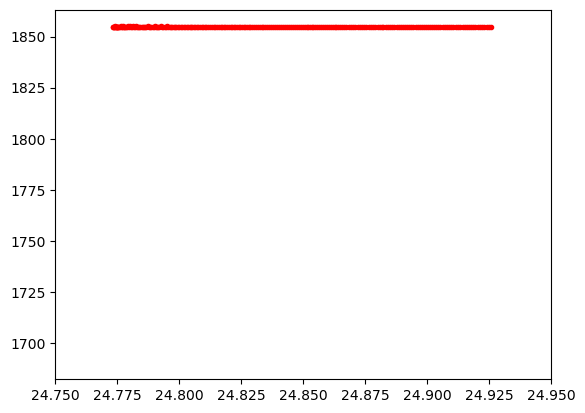

In [15]:
plt.plot(lat_atl13[ids_atl13],h_atl13[ids_atl13],"r.")
plt.xlim(24.75, 24.95)